Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI:Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: age(years)
Outcome: Class variable (0 or 1) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

Missing value detection

#missing value detection and treatment
following values in data set
# blank values
# NaN
# null
# some continous columns might have zero to indicate misssing value

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
# replacing 0 in with nan in data
from numpy import nan
data['Glucose']=data['Glucose'].replace(0,np.nan)
data['BloodPressure']=data['BloodPressure'].replace(0,np.nan)
data['SkinThickness']=data['SkinThickness'].replace(0,np.nan)
data['Insulin']=data['Insulin'].replace(0,np.nan)
data['BMI']=data['BMI'].replace(0,np.nan)

In [19]:
data.head().isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness                True
Insulin                      True
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
Gulcose                     False
dtype: bool

In [20]:
data.head().isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     3
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Gulcose                     0
dtype: int64

In [21]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
Gulcose                     117.0000
dtype: float64

In [22]:
data.fillna(data.median(),inplace=True)

In [23]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Gulcose                     0
dtype: int64

Outlier Detection and Treatment

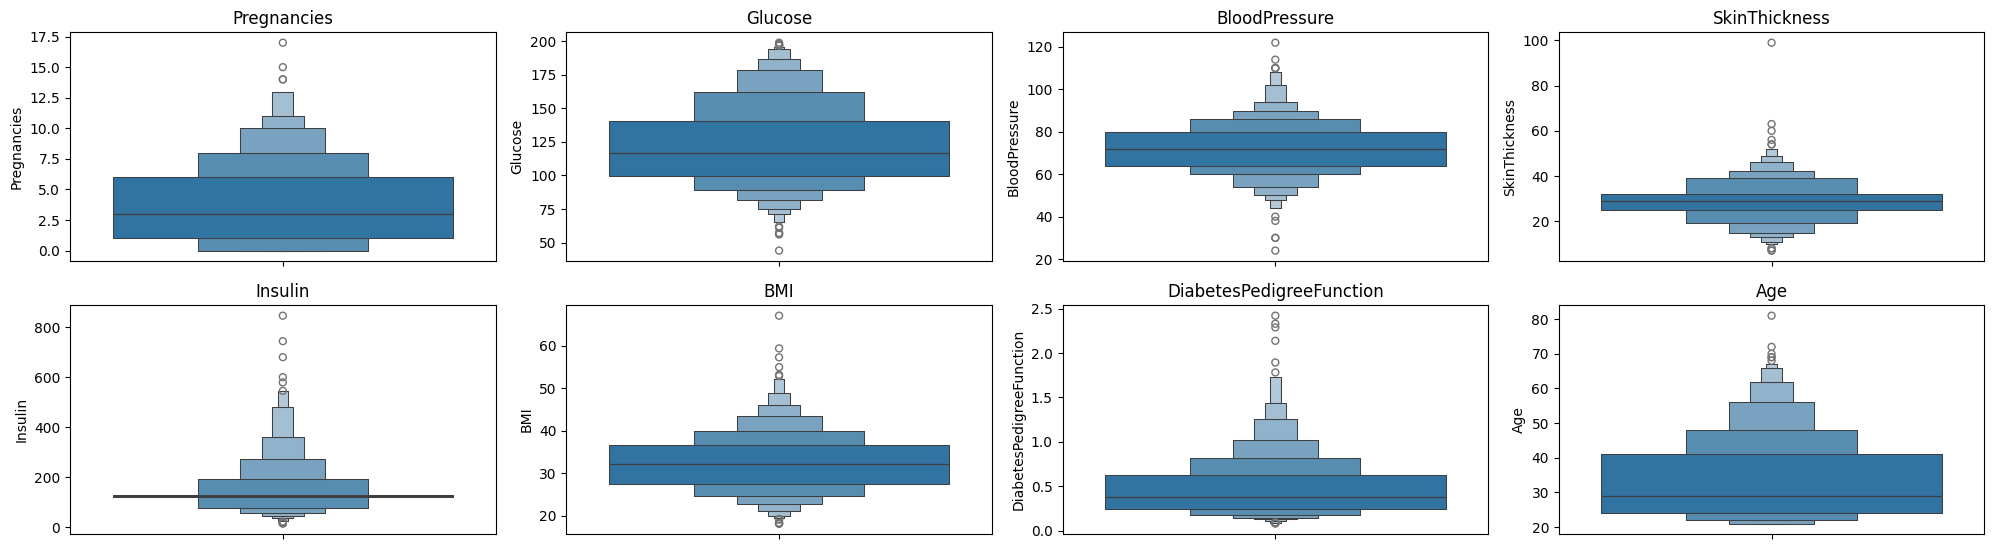

In [52]:
fig = plt.figure(figsize=(20, 11))

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, col in enumerate(columns, 1):
    plt.subplot(4, 4, i) 
    sns.boxenplot(y=data[col]) 
    plt.title(col)  

plt.tight_layout()  
plt.show()  




In [54]:
# sort out the oulier problem
def clip_outliers(df, columns, lower_quantile=0.05, upper_quantile=0.95):
    for col in columns:
        lower_bound = df[col].quantile(lower_quantile)
        upper_bound = df[col].quantile(upper_quantile)
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

data_clipped = clip_outliers(data, columns)

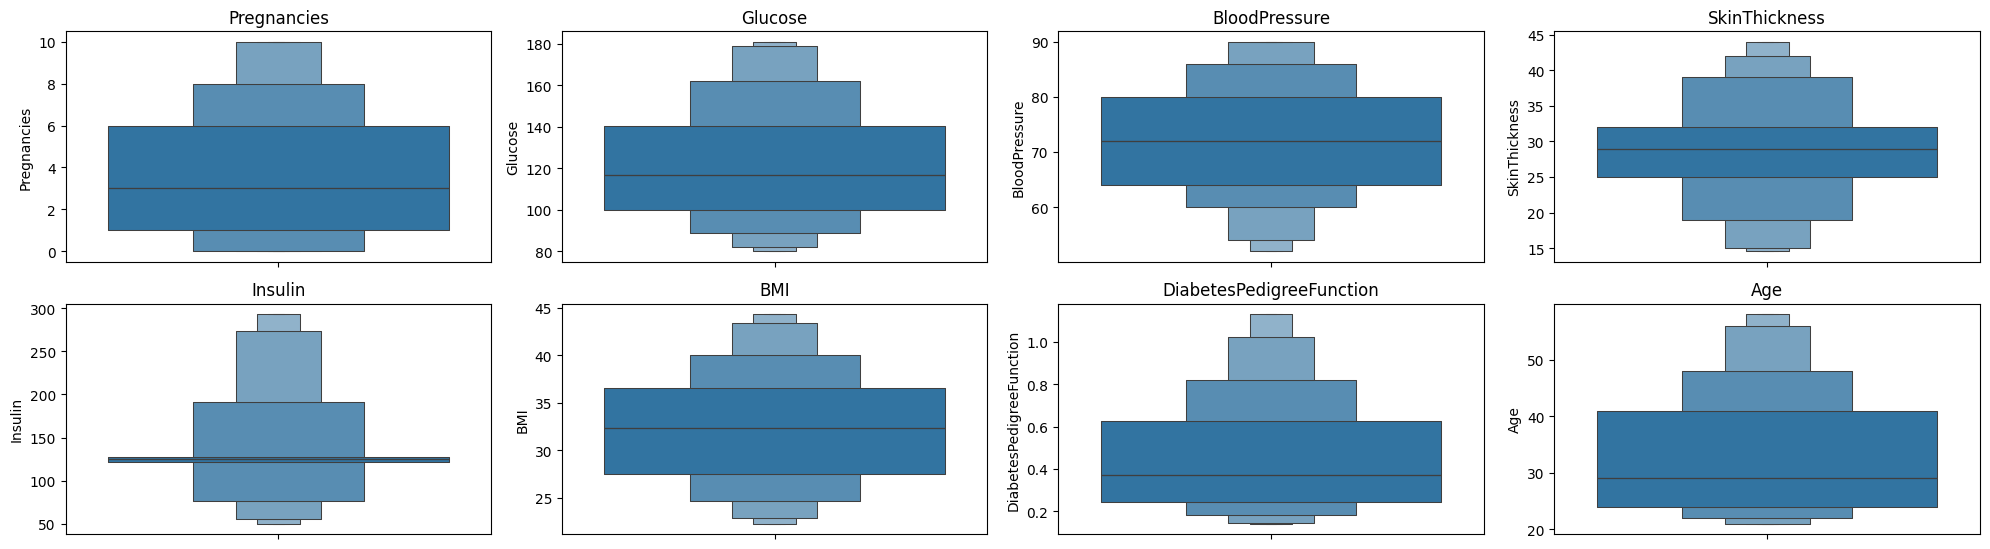

In [55]:
fig = plt.figure(figsize=(20, 11))

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, col in enumerate(columns, 1):
    plt.subplot(4, 4, i) 
    sns.boxenplot(y=data[col]) 
    plt.title(col)  

plt.tight_layout()  
plt.show() 

C:\Users\subahu sancheti\AppData\Local\Temp\ipykernel_20232\3886991825.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette='viridis')  # Use `x=` and pass `data`


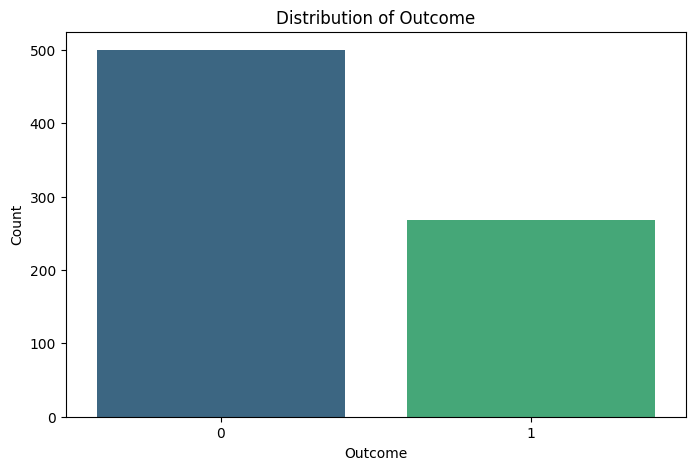

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=data, palette='viridis')  
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

<Axes: >

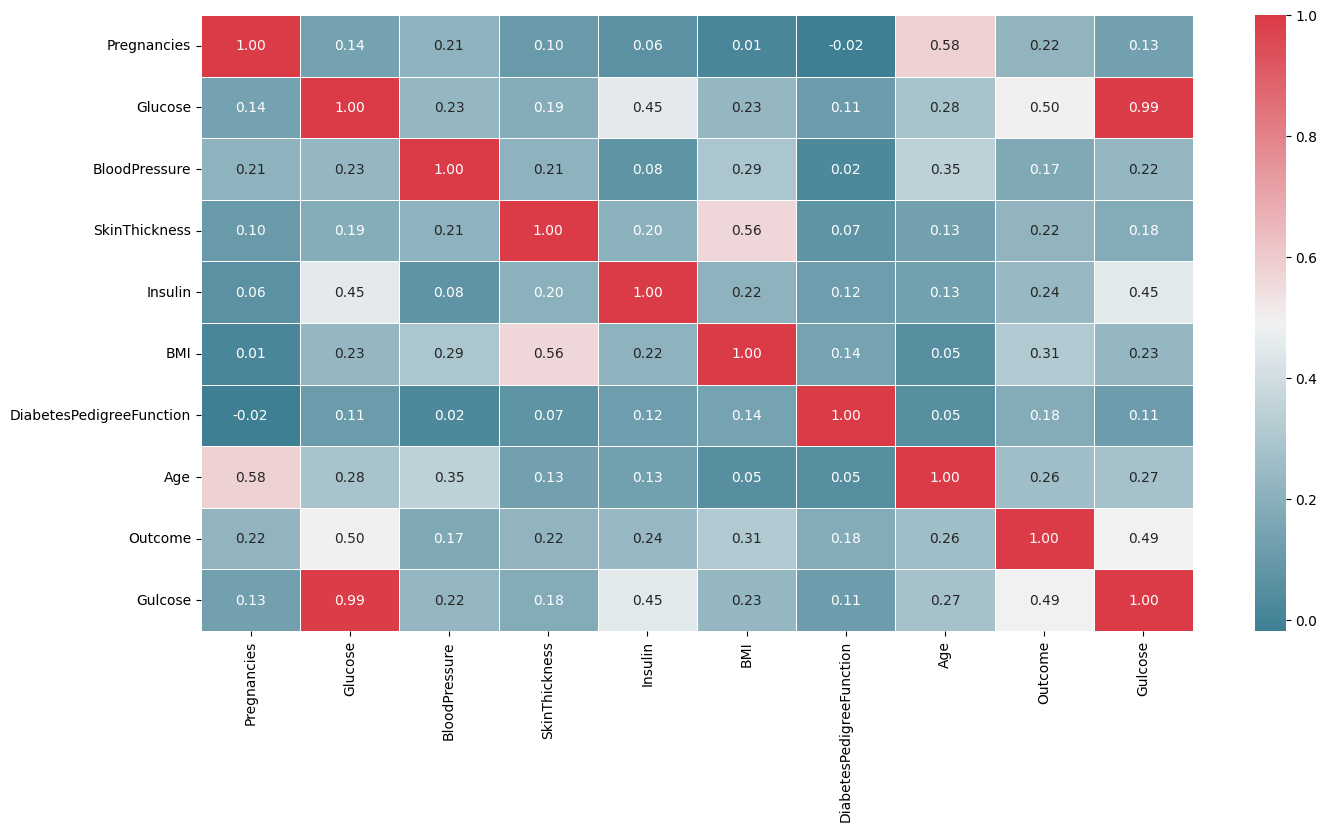

In [68]:
plt.figure(figsize=(16,8))
ax = plt.gca()
corr=data.corr("pearson")
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=bool),
    cmap=sns.diverging_palette(220, 10, as_cmap=True),  
    annot=True,  
    fmt=".2f",  
    linewidths=0.5,  
    ax=ax)

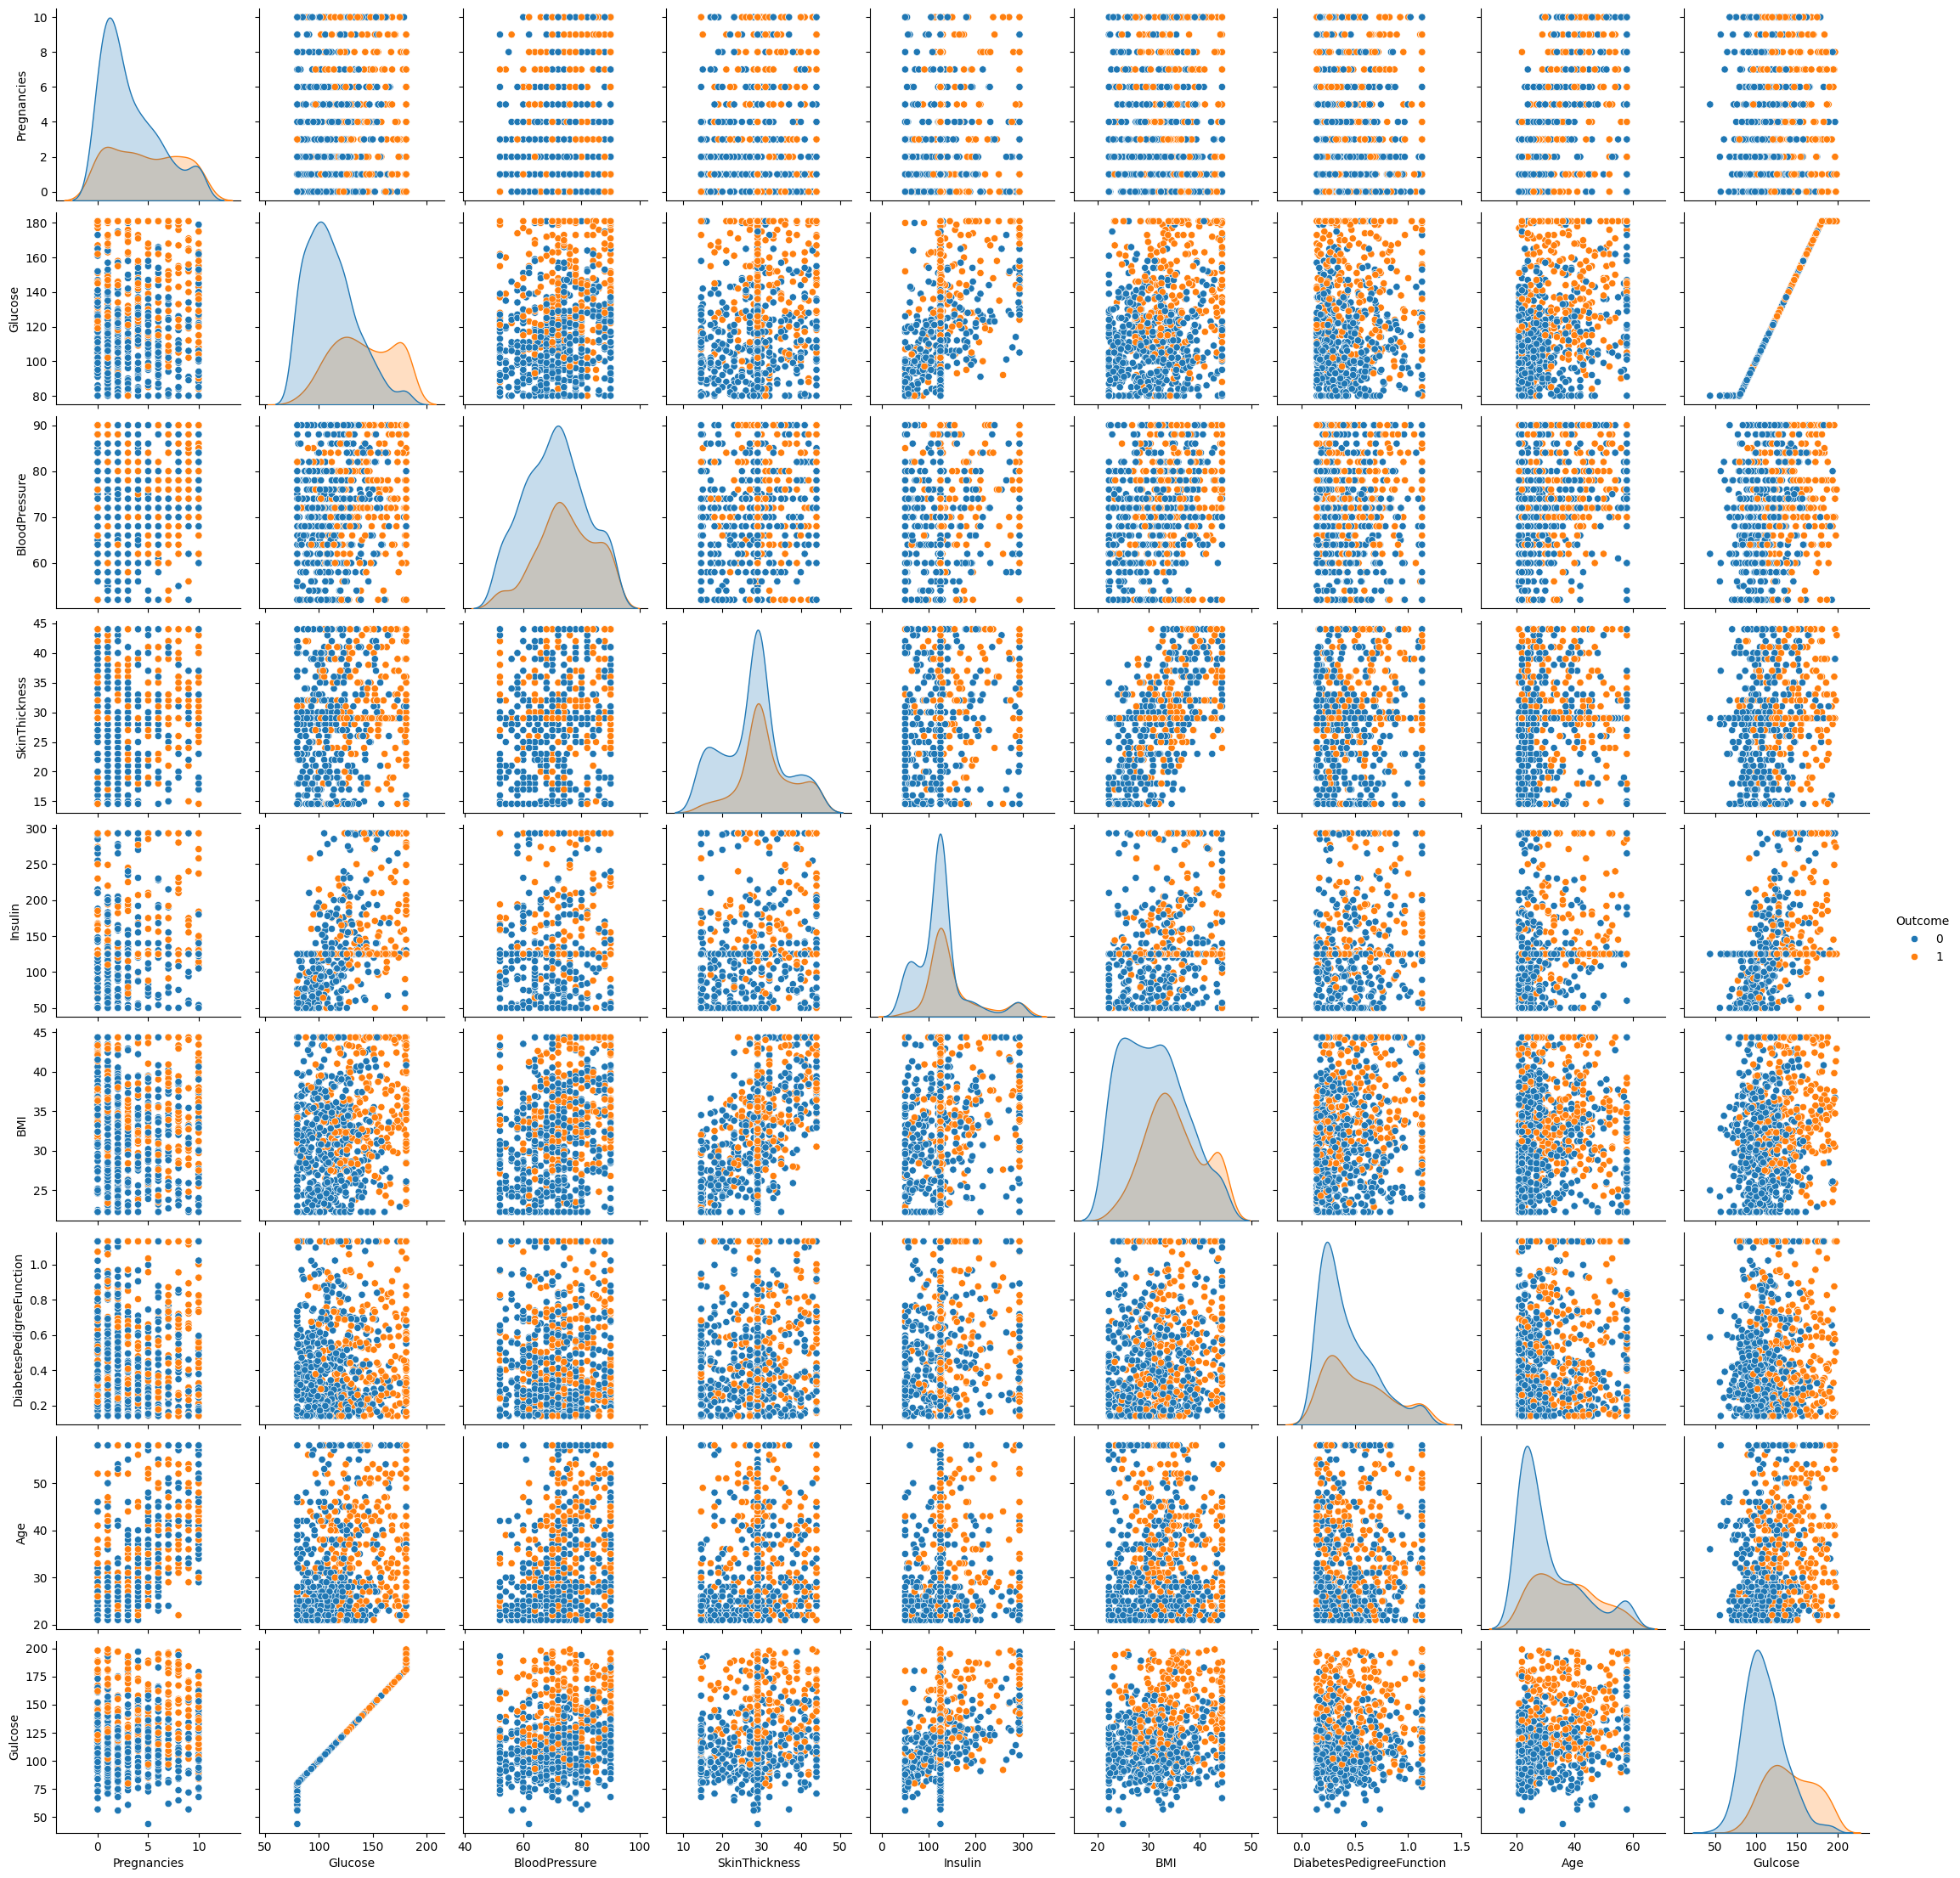

In [67]:
#pair plot

sns.pairplot(data,hue='Outcome',diag_kind='kde')

In [69]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Gulcose'],
      dtype='object')

In [59]:
from sklearn.model_selection import train_test_split
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=0)

In [60]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()

In [61]:
model.fit(xtrain,ytrain)

GaussianNB()

In [63]:
pred=model.predict(xtest)
pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [66]:
from sklearn import metrics

print("Acurracy:",metrics.accuracy_score(ytest,pred))

Acurracy: 0.7727272727272727
